# Linear Regression Multivariate

### load boston house data

In [5]:
### what is pickle (pkl)  ## 프로그램 변수를 파일형태로 저장하는게 피클임
import pickle

my_list = ['a', 'b', 'c']

with open('./data.pickle', 'wb') as fw:
  pickle.dump(my_list, fw)

with open('./data.pickle', 'rb') as fr:
  data_list = pickle.load(fr)

print(data_list)

['a', 'b', 'c']


In [15]:
# load data using pkl
import pandas as pd

with open('./boston_house.pkl', 'rb') as f :
  boston_house = pickle.load(f) #bunch object of sklearn

bh = pd.DataFrame(boston_house.data, columns=boston_house.feature_names)
bh['PRICE'] = boston_house.target

display(bh)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


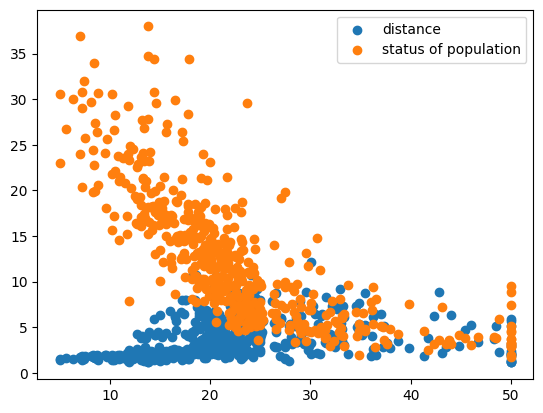

In [22]:
# check data set
import matplotlib.pyplot as plt

plt.scatter(bh['PRICE'], bh['DIS'], label='distance')
plt.scatter(bh['PRICE'], bh['LSTAT'], label='status of population')
plt.legend()
plt.show()

### split dataset

In [23]:
from os import X_OK
# split data
from sklearn.model_selection import train_test_split
x = boston_house['data']
y = boston_house['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=24)

### pre-processing (z-score normalization)

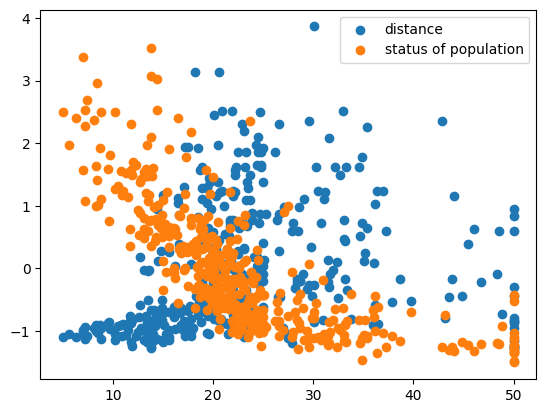

In [24]:
# standardization
x_offset = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
y_offset = y_train.mean()

xm_train = (x_train - x_offset) / x_std
xm_test = (x_test - x_offset) / x_std

# show
bh = pd.DataFrame(xm_train, columns=boston_house.feature_names)
bh['PRICE'] = y_train

plt.scatter(bh['PRICE'], bh['DIS'], label='distance')
plt.scatter(bh['PRICE'], bh['LSTAT'], label='status of population')
plt.legend()
plt.show()

### linear regression (using LinearRegression of scikit-learn )

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(xm_train, y_train) ## Learning
y_pred = model.predict(xm_test)

# (y_test - y_pred_test)^2
mse_test = mean_squared_error(y_test, y_pred)
print(f'mse_test : {mse_test}')

mse_test : 23.67448444173476


### linear regression (using optimize of scikit-learn )

mse_test : 23.674481577650777


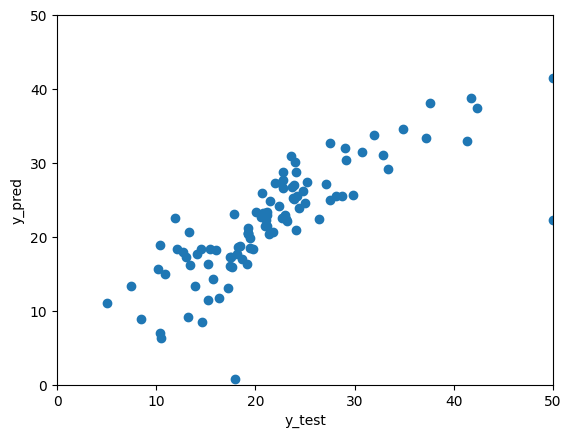

In [36]:
import numpy as np
from scipy.optimize import minimize

def linear_regression(params, X, y):
  W = params[:-1]
  b = params[-1]
  # y_pred = np.dot(X, w) + b
  y_pred = W @ X.T + b
  mse = np.mean((y - y_pred)**2)
  return mse

# xm_train.shape[1] : the number of features(13)
# +1 : bias = 14(11111111111111..1) [:-1] [-1]
initial_guess = np.zeros(xm_train.shape[1] + 1)


result = minimize(linear_regression, initial_guess, args=(xm_train, y_train))
W_opt, b_opt = result.x[:-1], result.x[-1]

## Test
y_pred_test = W_opt @ xm_test.T + b_opt
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'mse_test : {mse_test}')

# draw graph
plt.scatter(y_test, y_pred_test)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.show()